<a href="https://colab.research.google.com/github/musakhan18/Side-projects/blob/main/CatvsDog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-10-08 15:16:21--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.156, 2600:1413:b000:593::317f, 2600:1413:b000:592::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   277MB/s    in 2.8s    

2022-10-08 15:16:24 (277 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import load_img
import os
import random
warnings.filterwarnings('ignore')

Creating Dataframe

In [ ]:
input_path=[]
label=[]

for className in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+className):
    if className=='Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",className,path))
print(input_path[0],label[0])

PetImages/Dog/4426.jpg 1


In [ ]:
df=pd.DataFrame()
#nameing col
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True) #shuffeling data
df.head()

images  label
0    PetImages/Dog/464.jpg      1
1  PetImages/Cat/12417.jpg      0
2   PetImages/Cat/9988.jpg      0
3    PetImages/Dog/119.jpg      1
4   PetImages/Cat/4743.jpg      0

In [ ]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
# delete db files

df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']

In [ ]:
#finding corupted imgs
from numpy.ma.core import append
import PIL
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l    

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [ ]:
df=df[df['images']!='PetImages/Dog/11702.jpg']
df=df[df['images']!='PetImages/Cat/666.jpg']

Exploratory data analysis

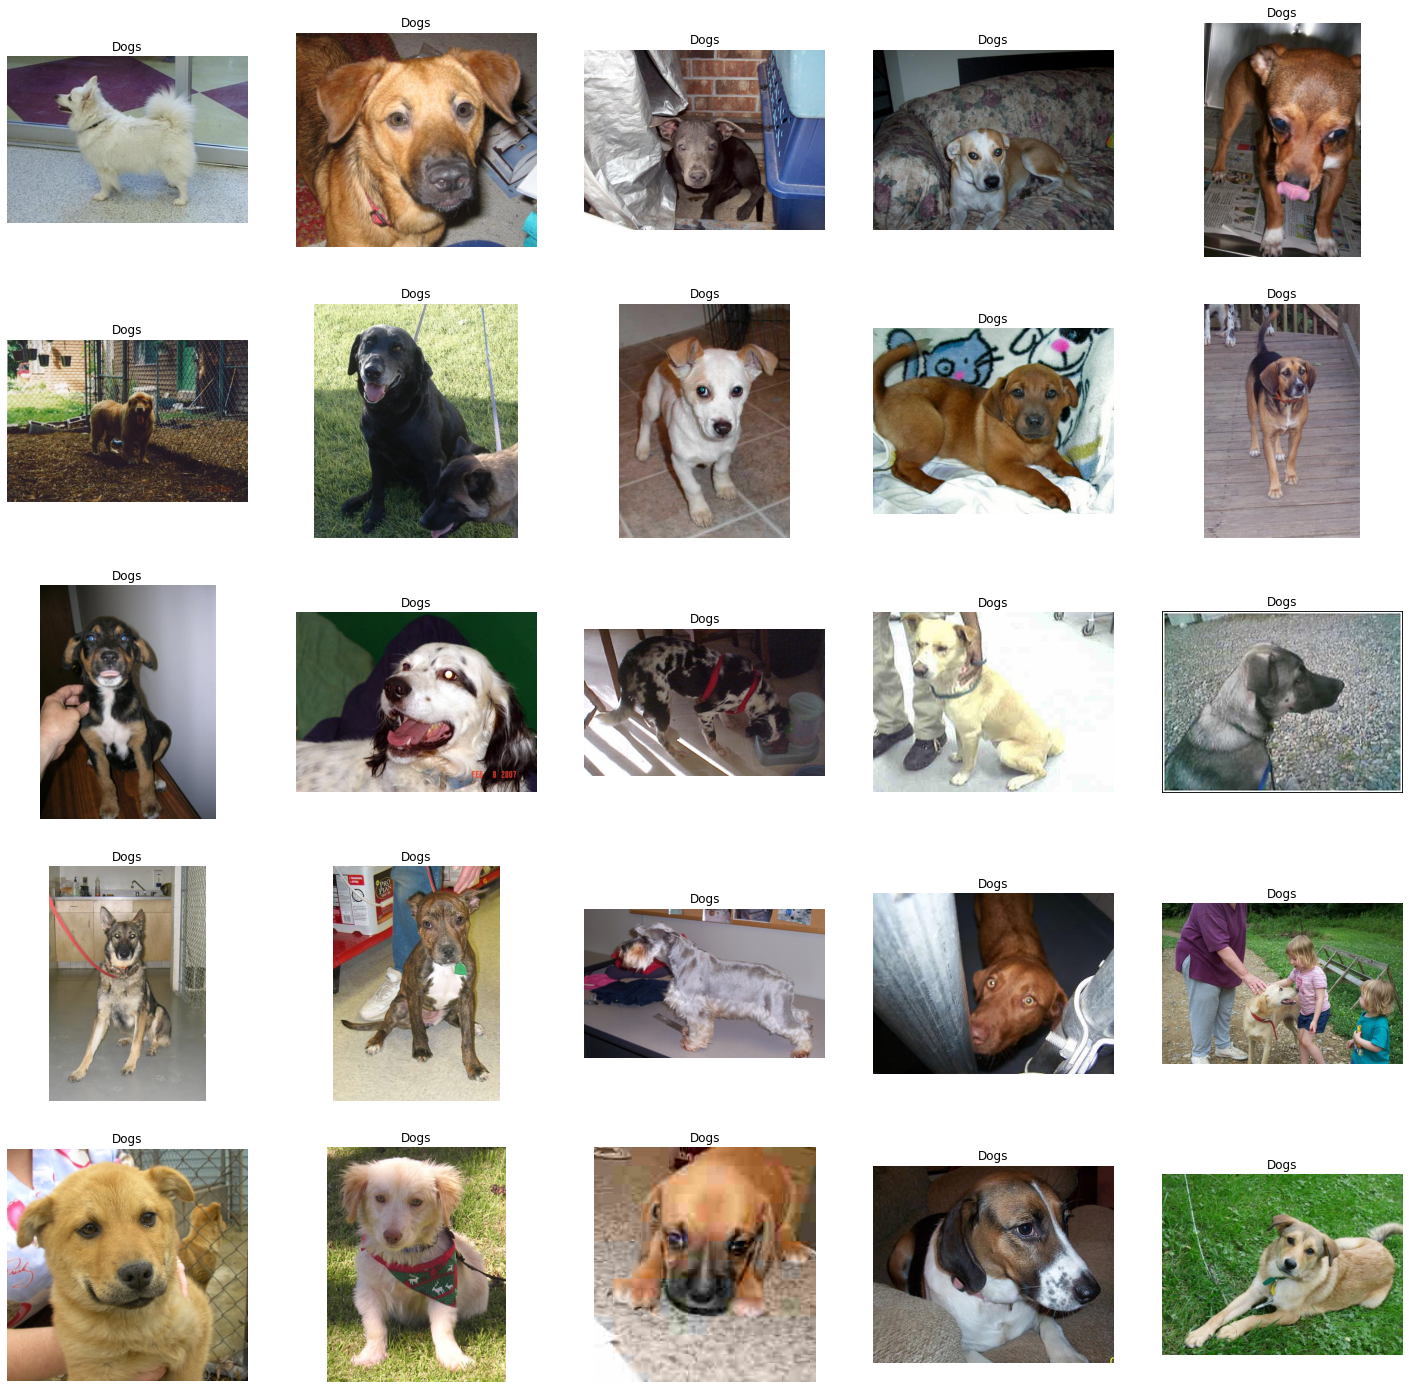

In [ ]:
from matplotlib import image
plt.figure(figsize=(25,25)) #to display grid of imgs
temp =df[df['label']==1]['images']

#selecting 25 random images
start=random.randint(0,len(temp))
files=temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img =load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

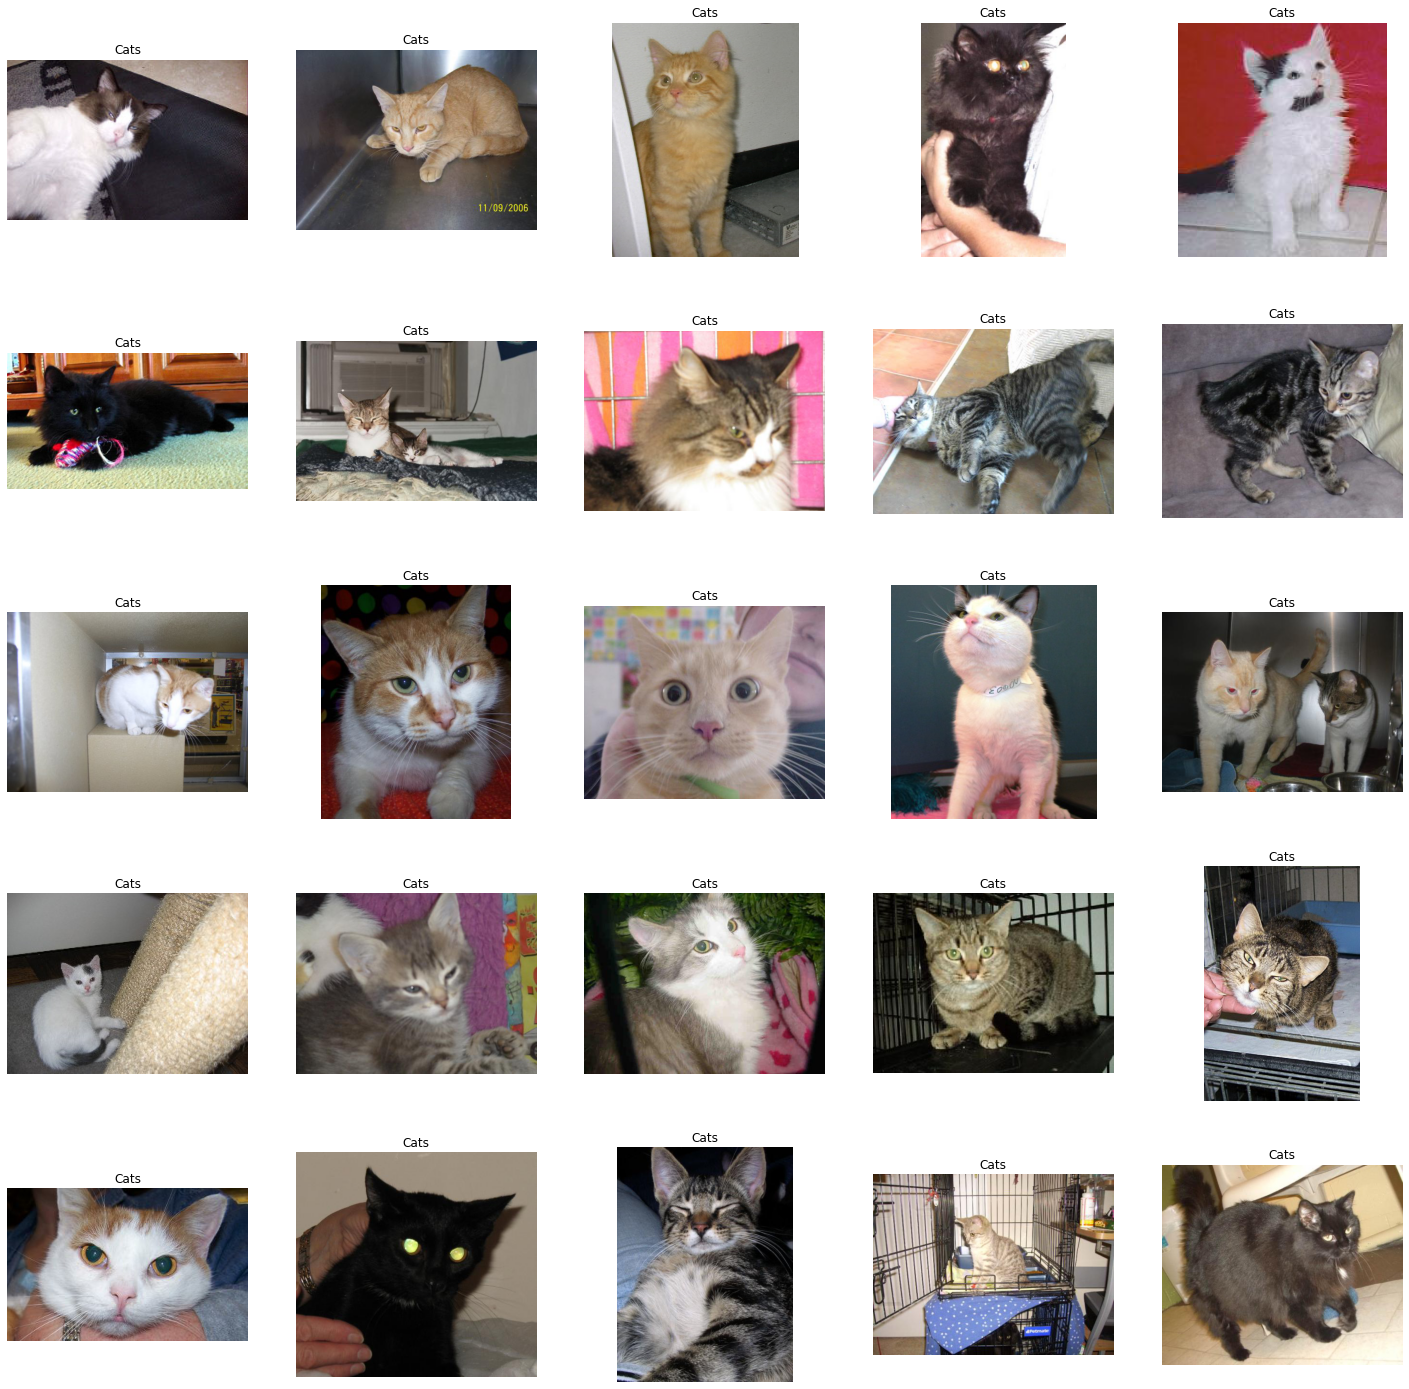

In [ ]:
from matplotlib import image
plt.figure(figsize=(25,25)) #to display grid of imgs
temp =df[df['label']==0]['images']

#selecting 25 random images
start=random.randint(0,len(temp))
files=temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img =load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

In [ ]:
df['label']=df['label'].astype('str')

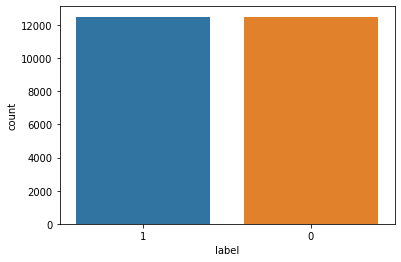

In [ ]:
 import seaborn as sns
 sns.countplot(df['label'])

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

Creat dataGentrator for the imgs

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_genrator=ImageDataGenerator(
    rescale=1./255, #img normalization
    #augmentation of imgs to avoid overfitting
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

val_genrator=ImageDataGenerator(rescale=1./255)

train_iterator=train_genrator.flow_from_dataframe(train,
                                                  x_col='images',
                                                  y_col='label',
                                                  target_size=(128,128),
                                                  batch_size=512,
                                                  class_mode='binary')

val_iterator=train_genrator.flow_from_dataframe(test,
                                                  x_col='images',
                                                  y_col='label',
                                                  target_size=(128,128),
                                                  batch_size=512,
                                                  class_mode='binary')

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)      

In [ ]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 144s 4s/step - loss: 0.6877 - accuracy: 0.5351 - val_loss: 0.6620 - val_accuracy: 0.6356
Epoch 2/10
40/40 [==============================] - 140s 4s/step - loss: 0.6387 - accuracy: 0.6381 - val_loss: 0.6090 - val_accuracy: 0.6736
Epoch 3/10
40/40 [==============================] - 139s 3s/step - loss: 0.6059 - accuracy: 0.6719 - val_loss: 0.5813 - val_accuracy: 0.6926
Epoch 4/10
40/40 [==============================] - 138s 3s/step - loss: 0.5651 - accuracy: 0.7091 - val_loss: 0.5507 - val_accuracy: 0.7212
Epoch 5/10
40/40 [==============================] - 139s 3s/step - loss: 0.5444 - accuracy: 0.7262 - val_loss: 0.5282 - val_accuracy: 0.7338
Epoch 6/10
40/40 [==============================] - 140s 4s/step - loss: 0.5099 - accuracy: 0.7518 - val_loss: 0.4874 - val_accuracy: 0.7706
Epoch 7/10
40/40 [==============================] - 139s 3s/step - loss: 0.4837 - accuracy: 0.7657 - val_loss: 0.4716 - val_accuracy: 0.7808
Epoch 8/10
40

Visualisation of results

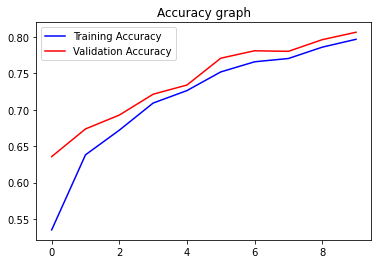

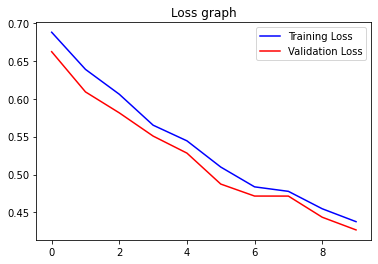

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy graph')
plt.legend()
plt.figure()

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss graph')
plt.legend()
plt.show()